# url: https://www.youtube.com/watch?v=KOdFcIR2txg

## 生存時間分析（生存時間解析）とは
「イベントが発生するまでの時間」について分析する手法の総称

病気の発症までの時間、システム故障までの時間、自社サービスのユーザ離脱までの時間、etc...

生存時間分析（Survival Analysis）は、個体や対象がイベント（例: 死亡、故障、疾患の発症）に至るまでの時間を統計的に分析する手法です。この分析は、生存曲線の推定や生存時間の比較、リスク因子の評価など、時間が経過する中でのイベントの発生パターンを理解するために使用されます。

主な用途としては医学や医療統計学での臨床試験や疾患の経過観察、信頼性工学での機械の故障予測、マーケティングでの製品寿命の分析などがあります。

## 生存時間分析の特徴:

### Censoring（検閲）:
すべての対象がイベントに至らないまま観察が終了することがあります。このような場合、対象がイベントに至るまでの時間が完全には把握できず、そのままの値を使うことが難しいため、検閲が用いられます。

### 生存曲線（Survival Curve）:
イベントが発生するまでの生存確率を示す曲線です。横軸に時間、縦軸に生存確率がプロットされます。

### ハザード関数（Hazard Function）:
時間tでイベントが発生する条件つき確率を示します。ハザード関数は、イベントの発生率を時間の関数として表現します。

### リスク因子の評価:
生存時間解析は、異なる群間で生存曲線を比較し、リスク因子の影響を評価するのに利用されます。

### Kaplan-Meier推定量:
一般的な生存曲線の推定手法で、検閲があるデータに対して適しています。

### Cox比例ハザードモデル:
リスク因子の影響を評価するための統計モデルで、共変量（説明変数）の影響をハザード比として表現します。

生存時間分析は統計学的なアプローチを使用しており、データセットが時間とイベントの情報を含む場合に適しています。 Pythonではlifelinesやsurvivalなどのライブラリが生存時間分析をサポートしています。

## 大きく分けて3種類
### 1.パラメトリックモデル
生存時間（継続時間）に最も影響を与える要因が知りたい！

    ※生存時間が何かしらの確率分布(指数分布やワイブル分布がよく使われる, 正規分布は使われない: これは最尤推定)に従うと仮定する場合

    ※ 回帰分析に似ている(yが生存時間（継続時間）で最も影響を与える要因(x：説明変数)が知りたい)

### 2.セミパラメトリックモデル
生存時間（継続時間）に最も影響を与える要因が知りたい！

    ※生存時間が従う確率分布を仮定しない場合

    ※Cox比例ハザードモデル

### 3.ノンパラメトリックモデル
2つの生存率に有意差があるか知りたい！

    ※これはy(生存時間（継続時間）)の情報しかない。仮説検定。
    
    ※ログランク検定

In [1]:
pip install japanize_matplotlib

In [2]:
!pip install lifelines

#データ、ライブラリ読み込み

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# アプリデータ
df_users = pd.read_csv("/content/data_for_survival analysis.csv", index_col = "氏名")
df_users_past = pd.read_csv("/content/data_for_survival analysis_1_1.csv", index_col = "氏名")

display(df_users.head())
display(df_users_past.head())

# 継続期間: アプリ使用期間
# 打ち切り: 何らかの要因で打ち切りになったらフラグがつく(死亡等)
# スマホ使用時間/日: n時間

,継続期間,打ち切り,性別,年齢,スマホ使用時間/日
氏名,,,,,
Aさん,12,0,男性,18,3
Bさん,87,1,男性,35,5
Cさん,56,0,女性,30,6
Dさん,44,0,男性,21,4
Eさん,39,1,女性,22,4


,継続期間,打ち切り
氏名,,
佐藤さん,34,0
鈴木さん,57,1
高橋さん,32,0
田中さん,54,0
伊藤さん,64,1


In [4]:
#ダミー変数化
df_users["性別"] = pd.get_dummies(df_users["性別"])["男性"] #男性をフラグとして1にする

# カプランマイヤー曲線の描画
生存時間解析ではカプランマイヤー曲線が一般的

縦線がある場合は打ち切りという意味

x: 時間(t)

y: 生存率



<Axes: xlabel='timeline'>

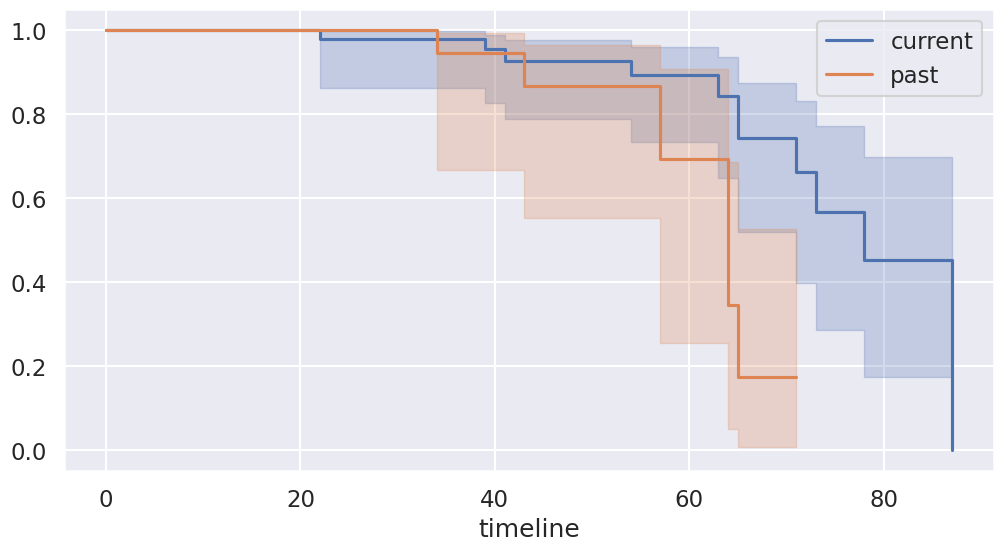

In [5]:
from lifelines import KaplanMeierFitter

sns.set(context = "talk")
fig = plt.subplots(figsize = (12,6))

kmf = KaplanMeierFitter()

# durations: 継続時間(x軸)
# event_observed : 打ち切りの情報がある場合に引数に入れる
kmf.fit(durations = df_users["継続期間"], event_observed = df_users["打ち切り"])

# 線はカプランマイヤー曲線
# 背景の薄っすらしたものが信頼区間
kmf.plot(label = "current")

kmf.fit(durations = df_users_past["継続期間"], event_observed = df_users_past["打ち切り"])
kmf.plot(label = "past")

# kmf.fit(durations=df_users["継続期間"], event_observed=df_users["打ち切り"])で指定されている durations と event_observed は生存時間分析における特定の概念に基づいています。
# durations: これは各サンプルの観察期間（または生存時間）を示します。各サンプルには継続期間がありますが、イベントが発生した場合はそのイベントまでの期間、発生しなかった場合は全体の期間が durations になります。これが x 軸になります。
# event_observed: これはイベントが発生したかどうかを示すバイナリの列です。イベントが発生した場合は1、発生しなかった場合は0です。これが y 軸になり、イベントが発生するという状況を示します。

# したがって、kmf.fit(durations=df_users["継続期間"], event_observed=df_users["打ち切り"])は、各サンプルの継続期間とイベントの発生状況に基づいて、生存時間分析のKaplan-Meier推定量を計算します。
# 生成された生存曲線は、観察期間におけるイベントの発生確率を示します。これは通常、時間の経過に伴うイベントの発生パターンを把握するために使用されます。

#セミパラメトリックモデル（cox比例ハザードモデル）

In [6]:
# y(生存時間（継続時間）)で最も影響を与える要因(x：説明変数)を調べる
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(df_users, duration_col="継続期間", event_col="打ち切り")
cph.print_summary()

# p値: p < 0.05であれば有意差あり
# 以下ではスマホ使用時間/日のみがp < 0.05で優位差あり
# つまりy(生存時間（継続時間）)で最も影響を与える要因(x：説明変数)はスマホ使用時間/日になる(関連がある)
# 性別と年齢はp > 0.05のためあまり影響を与える要因ではないとわかる(関連が低い)

# coef(回帰係数)を確認することで、どのくらい関連性があるのか数値(回帰係数)で確認できる
# coef(回帰係数)がマイナス -> 危険度が低いという意味(低い方がアプリを長く使ってくれる(継続してくれる))
# coef(回帰係数)がプラス -> 危険度が高いという意味(正だと危険度が高いためアプリを長く使ってくれない(継続してくれない(解約されてしまう)))

# スマホ使用時間/日が長ければ長いほど、離脱率が低い(危険率が低いから)

# Partial AIC(赤池情報量基準): 当てはまりの良さを見る指標, 数値が低ければ低いほど当てはまりがいい
# これは説明変数の数を増やしたり、減らしたりすることで数値が変動する可能性がある

<lifelines.CoxPHFitter: fitted with 52 total observations, 41 right-censored observations>
             duration col = '継続期間'
                event col = '打ち切り'
      baseline estimation = breslow
   number of observations = 52
number of events observed = 11
   partial log-likelihood = -25.42
         time fit was run = 2023-11-28 02:55:58 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
性別         -0.27       0.76       0.69            -1.63             1.08                 0.20                 2.96
年齢         -0.03       0.97       0.03            -0.08             0.02                 0.92                 1.02
スマホ使用時間/日  -0.55       0.58       0.23            -1.00            -0.10                 0.37                 0.91

            cmp to     z    p   -log2(p)
covariate                               
性別            0.00 -0.39 0.69       0.53
年齢            0.00 -1.16 0.25       2.02
スマホ使用時間/日     0.00 -2.39 0.02       5.88
---
Concordance = 0.81
Partial AIC = 56.85
log-likelihood ratio test = 6.42 on 3 df
-log2(p) of ll-ratio test = 3.43

In [7]:
cph = CoxPHFitter()
cph.fit(df_users.drop(['性別','年齢'], axis = 1), duration_col="継続期間", event_col="打ち切り")
cph.print_summary()

# Partial AIC(赤池情報量基準)が少し低くなった
# 今回はこっちの方を採用しようと判断できる

<lifelines.CoxPHFitter: fitted with 52 total observations, 41 right-censored observations>
             duration col = '継続期間'
                event col = '打ち切り'
      baseline estimation = breslow
   number of observations = 52
number of events observed = 11
   partial log-likelihood = -26.33
         time fit was run = 2023-11-28 02:55:59 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
スマホ使用時間/日  -0.49       0.61       0.22            -0.91            -0.06                 0.40                 0.94

            cmp to     z    p   -log2(p)
covariate                               
スマホ使用時間/日     0.00 -2.26 0.02       5.38
---
Concordance = 0.79
Partial AIC = 54.66
log-likelihood ratio test = 4.61 on 1 df
-log2(p) of ll-ratio test = 4.98

#ノンパラメトリック（ログランク検定）

In [8]:
# 目的変数のみ
# 昔と今ではどちらの方が継続率(生存率)が高いのか, その差に優位差があるのかを調べられる
from lifelines.statistics import logrank_test

# 継続期間(x軸), 打ち切りの情報があれば引数に追加する
results = logrank_test(df_users["継続期間"], df_users_past["継続期間"], df_users["打ち切り"], df_users_past["打ち切り"])
results.print_summary()

# p値が 0.03 < 0.05なので有意差ありと判断できる
# つまり昔と今では生存率に差があるということがわかる

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.61 0.03      4.97

# 追加

In [9]:
# 生存時間分析の例として、Pythonのlifelinesライブラリを使用して、Kaplan-Meier推定量やCox比例ハザードモデルの構築を行います。
# 以下に具体例を示します。

# まず、lifelinesライブラリをインストールします。
# !pip install lifelines

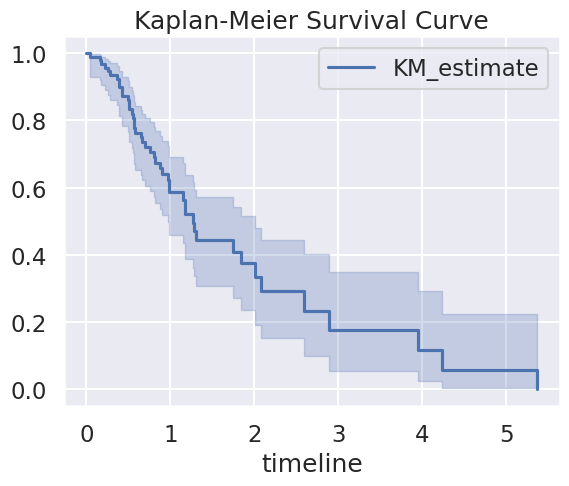

<lifelines.CoxPHFitter: fitted with 100 total observations, 55 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 45
   partial log-likelihood = -155.32
         time fit was run = 2023-11-28 02:55:59 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ cmp to,  z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 310.64
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

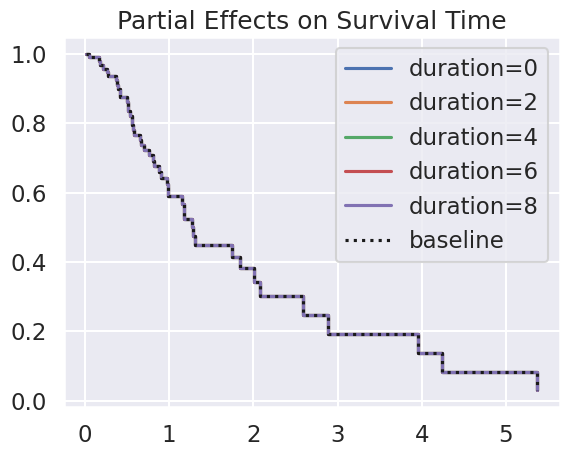

In [10]:
# 次に、例としてランダムな生存時間データを作成し、それを用いて生存曲線の推定とCox比例ハザードモデルの構築を行います。
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

# ランダムな生存時間データの生成
np.random.seed(123)
data = pd.DataFrame({
    'duration': np.random.exponential(size=100),
    'event': np.random.choice([1, 0], size=100)
})

# Kaplan-Meier推定量の計算
kmf = KaplanMeierFitter()
kmf.fit(durations = data['duration'], event_observed = data['event'])

# 生存曲線のプロット
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.show()

# Cox比例ハザードモデルの構築
cph = CoxPHFitter()
cph.fit(data, duration_col = 'duration', event_col = 'event')

# モデルのサマリー表示
cph.print_summary()

# 特定の共変量に対するハザード比のプロット
cph.plot_partial_effects_on_outcome(covariates = 'duration', values = np.arange(0, 10, 2))
plt.title('Partial Effects on Survival Time')
plt.show()

# この例では、lifelinesライブラリを使用して、生存時間データのKaplan-Meier推定量とCox比例ハザードモデルを作成しています。
# durationは生存時間を、eventはイベントが発生したかどうかを示すバイナリ変数です。

# Kaplan-Meier生存曲線は、kmf.plot_survival_function()でプロットされます。
# Cox比例ハザードモデルの構築にはCoxPHFitterを使用し、print_summary()でモデルのサマリーを表示します。
# また、plot_partial_effects_on_outcome()を使用して特定の共変量に対するハザード比をプロットしています。

# これは基本的な生存時間分析の例であり、実際のデータや問題によってはさらなる調整や検討が必要です。

# 有意差（Statistical Significance)

有意差（Statistical Significance）は、統計学での重要な概念であり、実験や研究において得られた結果が偶然ではなく、本当に意味があるかどうかを評価するために使用されます。
簡単に言えば、観測された差異や効果が統計的に意味があるかどうかを判断する指標です。

一般的な手順は次の通りです：

1. 帰無仮説（Null Hypothesis）の設定: 実験や検証の際には、何かしらの仮説を立てます。これが帰無仮説で、通常は「効果や差異はない」という仮説です。

2. 統計的検定の選択: 有意差を検証するために、適切な統計的検定を選択します。例えば、t検定やχ²検定などが一般的です。

3. 検定統計量の計算: 選んだ統計的検定を用いて、検定統計量を計算します。これは実際に得られたデータに基づいて計算される値で、帰無仮説が成立するときの期待値と比較されます。

4. p値の計算: 検定統計量からp値が計算されます。p値は、帰無仮説が成立する場合に、観測された検定統計量以上の極端な値が得られる確率を示します。

5. p値の評価: p値が事前に決められた有意水準（通常は0.05や0.01）よりも小さい場合、帰無仮説を棄却します。このとき、「統計的に有意な差異がある」と言えます。

6. 結論の導出: 有意差が得られた場合、帰無仮説が成り立たないことが示されるため、通常は対立仮説を採択します。有意差が得られなかった場合、帰無仮説を採択します。

有意差の判断は統計的な計算として行われますが、注意が必要な点もあります。p値が小さいからといって必ずしも結果が重要であるわけではなく、実際の効果の大きさや実用的な意義も考慮する必要があります。また、多重比較補正なども検討されることがあります。

---

# p値が事前に決められた有意水準（通常は0.05や0.01）よりも小さい場合、帰無仮説を棄却します。このとき、「統計的に有意な差異がある」と言えます。とあるけど、この0.05というのは100回実験したら95回はこの結果が出るって認識でいいの?

はい、その認識は正確です。有意水準（通常は0.05や0.01）は、統計的な検定を行った場合に、帰無仮説が真であるにもかかわらず、その帰無仮説を棄却する確率を示しています。一般的には「5%水準で有意」とか「1%水準で有意」といいます。

具体的には、有意水準を0.05とした場合、帰無仮説が真の状態であるにもかかわらず、その結果が偶然に発生する確率が5%以下であれば、「統計的に有意な差異がある」と判断します。同様に、有意水準が0.01の場合は、その確率が1%以下であれば有意とされます。

ただし、これはあくまで統計的な判断であり、1回の検定結果に対して有意水準を適用すると、たまたま偽陽性（誤った有意差）が生じることもあります。これを複数回繰り返すと、いずれかで誤った結果が出る可能性が高まります。この問題に対処するためには、多重検定補正などの手法を適用することがあります。

In [11]:
# scipyライブラリのttest_ind関数ver

# 有意差の概念を理解するために、t検定を例に挙げて具体的なPythonコードを示します。
# 以下は、2つのグループの平均値に有意差があるかどうかを検定する例です。
# まず、2つのグループのデータを生成します。
import numpy as np

# グループAのデータ生成
np.random.seed(42)
group_a = np.random.normal(loc=50, scale=10, size=30)

# グループBのデータ生成（平均が異なる）
group_b = np.random.normal(loc=55, scale=10, size=30)

# これで、group_aとgroup_bにそれぞれ異なる平均が設定された正規分布に従うデータが生成されました。
# 次に、t検定を実行して有意差を検証します。
from scipy.stats import ttest_ind

# t検定
t_statistic, p_value = ttest_ind(group_a, group_b)

# 結果の表示
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# このコードでは、scipyライブラリのttest_ind関数を使用して、2つの独立したサンプルのt検定を行っています。
# t検定の結果はt_statistic（t統計量）とp_value（p値）として得られます。

# p値がある有意水準（通常は0.05）よりも小さい場合、帰無仮説（「2つのグループの平均は等しい」）が棄却され、有意な差異があると結論されます。

t-statistic: -2.3981151520102415
p-value: 0.019717941865758228


# AIC(赤池情報量基準)ついて教えて

赤池情報量基準（AIC: Akaike Information Criterion）は、統計モデルの適合度とモデルの複雑さをバランスするための情報量基準の一つです。小値が好ましいとされ、異なるモデルの比較に利用されます。

AICは以下の数式で表されます:
AIC=−2log(L)+2k

ここで:

    L はモデルの尤度（尤度関数の最大値）
    k はモデルの推定されるパラメータ数（自由度）です。

AICの目的は、尤度を最大化する一方で、モデルの複雑さをペナルティとして考慮することです。AICはモデルの良さ（適合度）とモデルの複雑さのバランスをとります。最小化されるAICのモデルがデータに最も適していると考えられます。

例えば、異なる次数の多項式回帰モデルや異なる特徴量の組み合わせなど、複数のモデルがある場合、AICを計算して最も小さいAICを持つモデルが選択されることがあります。

Pythonの統計モデリングライブラリであるstatsmodelsや機械学習ライブラリであるscikit-learnなどで、モデルの適合度を評価する際にAICが使用されることがあります。






In [12]:
# statsmodelsライブラリを使用して、AICを計算する具体的な例を示します。以下は、単純な線形回帰モデルに対してAICを計算する例です。
import numpy as np
import statsmodels.api as sm

# サンプルデータ生成
np.random.seed(42)
X = np.random.rand(100, 1)  # 1次元の説明変数
y = 2 * X.squeeze() + 1 + np.random.randn(100)  # 線形関係 + ノイズ

# モデルの構築
X_with_intercept = sm.add_constant(X)  # 切片の追加
model = sm.OLS(y, X_with_intercept)  # 最小二乗法（Ordinary Least Squares, OLS）
result = model.fit()  # モデルの適合

# AICの取得
aic = result.aic

# 結果の表示
print(f"AIC: {aic}")
print(result.summary())
print(result.summary2())

# この例では、1次元の説明変数 X とそれに基づく目的変数 y を用いて、線形回帰モデルを構築しています。
# statsmodelsのOLSクラスを使用して最小二乗法によりモデルを適合させ、その後、AICをresult.aicから取得しています。
# AICの値は小さいほど良いモデルとされます。このAICを用いて異なるモデルの比較やモデル選択を行うことがあります。

AIC: 266.2930532523742
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     25.25
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.26e-06
Time:                        02:56:00   Log-Likelihood:                -131.15
No. Observations:                 100   AIC:                             266.3
Df Residuals:                      98   BIC:                             271.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2151      0.